## 1

In [1]:
import numpy as np
'''
write a script to conduct the power iterations for a arbitary symmetric matrix A
with only 1 rank

'''
n = 10 #suppose A in a 10 * 10 matrix
v1 = np.random.rand(n) #randomly generate eigenvalue v1 for decomposition 
v1 = v1 / np.linalg.norm(v1) # normalize v1
#define the n*n symmetric, rank 1 matrix A
A = np.outer(v1, v1)
#define the inital vector b0
b_0 = np.ones(n, dtype = float)/np.sqrt(n)

#power iteration parameters
tolerance = 0.01
iterations = 0
b_k = b_0
error = 1 

#power iterations
while error > tolerance:
    b_k1 = A.dot(b_k)

    #normalize the result
    b_k1_norm = np.linalg.norm(b_k1)
    b_k1 = b_k1 / b_k1_norm

    #calculate the error 
    error = np.linalg.norm(b_k1 - v1)

    #next iteration 
    b_k = b_k1
    iterations += 1

    #break the loop if within the tolerance
    if error <= tolerance:
        break


iterations, error






(1, 1.3019674641152052e-16)

the power iteration converged to the dominant eigenvector $v_1$ in just 1 interations, with the tolerance of %1. The result is expected since the rank 1 matrix A will project any zero vector onto $v_1$, immediately due to the nature of the rank-one matrix, which is an outer product of $v_1$ with itself.

# 2


In [2]:
# Enable interactive rotation of graph
%matplotlib widget

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')

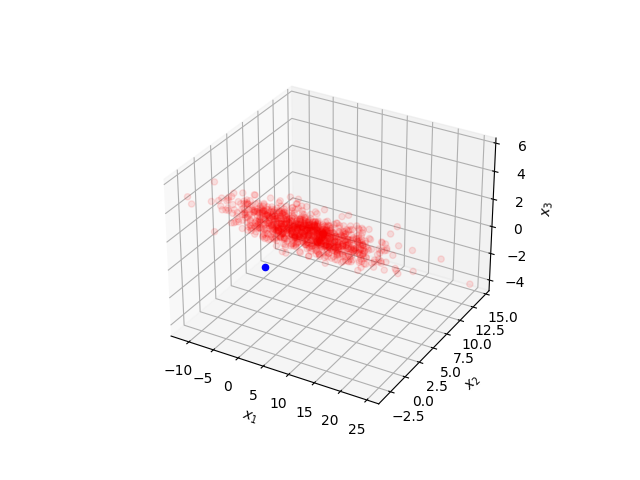

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

according the graph, the data is not lie in a low-dimensional subspace because it do not contain the zero vector. 

In [4]:
# Subtract mean
X_m = X - np.mean(X, 0)

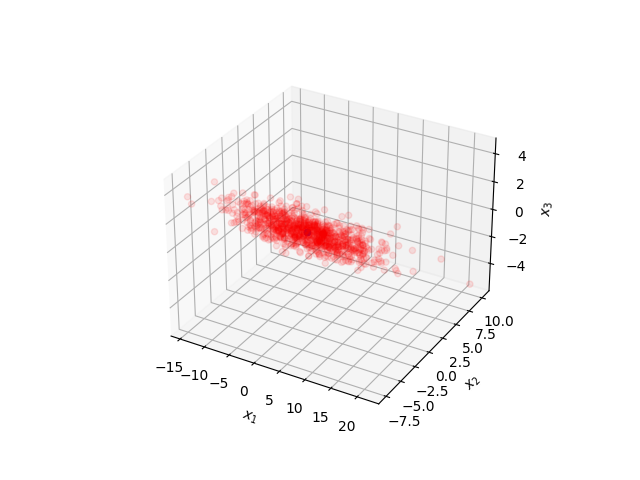

In [5]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

After zero mean normalization, it contains the zero vector. 

In [6]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = VT[0]

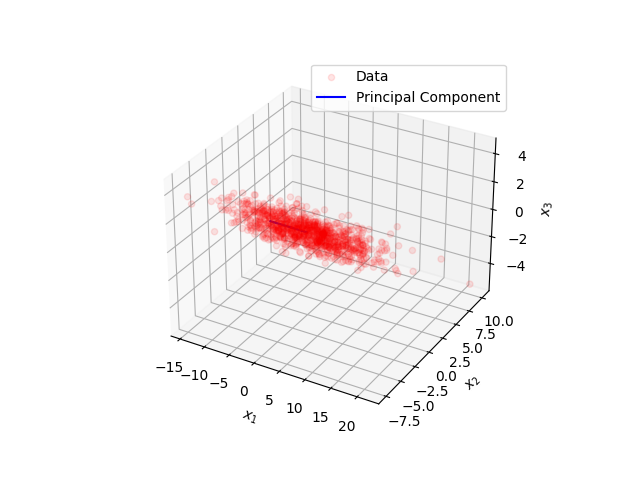

In [7]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

The data points are spread out and mostly aligned along this line, which suggests that the first principal component captures a significant portion of the variance in the data. This indicates that projecting the data onto this subspace would retain much of the original data's structure, which is precisely the goal of using the principal component for dimensionality reduction.

In [8]:
# squaring the first singular value
variance_captured_by_first_component = s[0]**2

# squaring all singular values and summing to get total variance
total_variance = np.sum(s**2)

# proportion of variance explained by the first component
proportion_of_variance = (variance_captured_by_first_component / total_variance) * 100
print(proportion_of_variance)

97.69022365781458


## e

since $a$ is the principal direction, and $w_i$ is the projection of $x_i$ onto $a$, the value $w_i$ are given by the projection of $X$ onto the first principle component.  Therefore, $w_i$ can be found using the first column of U and the first singular value $\sigma_1$. 
$$ w_i = \sigma_1 u_i

So, $b$ is the mean of the original data set across each dimension. If you have a data matrix $X$, where each row corresponds to a data point and each column corresponds to a feature, the mean $μ$ of the data would be a vector where each component is the mean of the corresponding feature column in $X$.

In [9]:
# the first two columns of U for the orthonormal basis
U2 = U[:, :2]

X_approx_2 = U2.dot(np.diag(s[:2])).dot(VT[:2, :])

X_approx_2

array([[11.18430814,  5.3315948 , -0.88826538],
       [ 3.41454955,  1.65138299, -0.47852885],
       [ 2.09449227,  1.0523074 , -0.63838285],
       ...,
       [ 0.53520662,  0.22159313,  0.25147638],
       [ 1.59260018,  0.6570293 ,  0.76899203],
       [-4.80486921, -2.31211678,  0.57110436]])

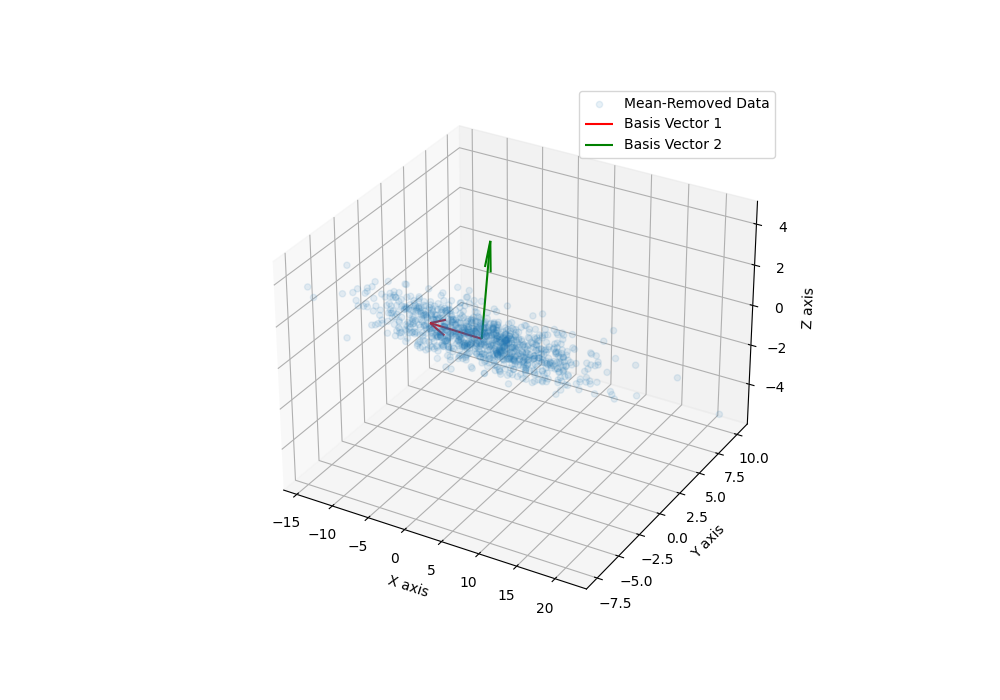

In [10]:
# orthonormal basis vectors for the best plane containing the mean-removed data
basis_vector_1 = VT[0, :]
basis_vector_2 = VT[1, :]

# plot the mean-removed data
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# original data points
ax.scatter(X_m[:, 0], X_m[:, 1], X_m[:, 2], alpha=0.1, label='Mean-Removed Data')

# first basis vector
ax.quiver(0, 0, 0, basis_vector_1[0], basis_vector_1[1], basis_vector_1[2], color='r', length=5, label='Basis Vector 1')

# second basis vector
ax.quiver(0, 0, 0, basis_vector_2[0], basis_vector_2[1], basis_vector_2[2], color='g', length=5, label='Basis Vector 2')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()

In [11]:
s

array([162.8047015 ,  21.76566894,  12.36711671])

In [12]:
U[:, 0]

array([-7.54058103e-02, -2.33671002e-02, -1.49086299e-02, -6.30946924e-02,
       -1.19141752e-02, -3.85145857e-02,  1.29531824e-02,  1.89930298e-02,
        4.86971484e-02, -1.24908753e-02,  4.04076277e-02,  1.21784232e-03,
       -5.05557365e-03, -2.86929314e-02,  3.71762275e-02, -1.55387133e-02,
       -1.92251848e-02,  1.38128258e-02, -5.05845155e-02,  5.95125080e-02,
       -4.66296495e-02, -2.99470287e-04,  4.72094826e-02, -1.31394490e-02,
       -3.21263959e-02, -7.99438755e-03,  1.87084926e-02,  1.12093170e-02,
       -4.22168449e-02,  4.34216144e-02,  3.46221661e-02,  3.90287536e-03,
       -6.98513138e-03,  9.76238828e-04,  8.85730875e-03, -4.20581850e-02,
        6.13148555e-02, -9.29998742e-02,  3.42980255e-02, -2.68203268e-02,
        6.03162537e-02,  1.90575714e-02,  7.34310588e-03, -1.42644099e-03,
        4.15003275e-02,  5.18729270e-02,  3.31725789e-02, -9.01543070e-03,
        2.91035861e-04, -6.02870633e-03,  3.01519199e-02, -4.65521634e-02,
        2.96787315e-02,  

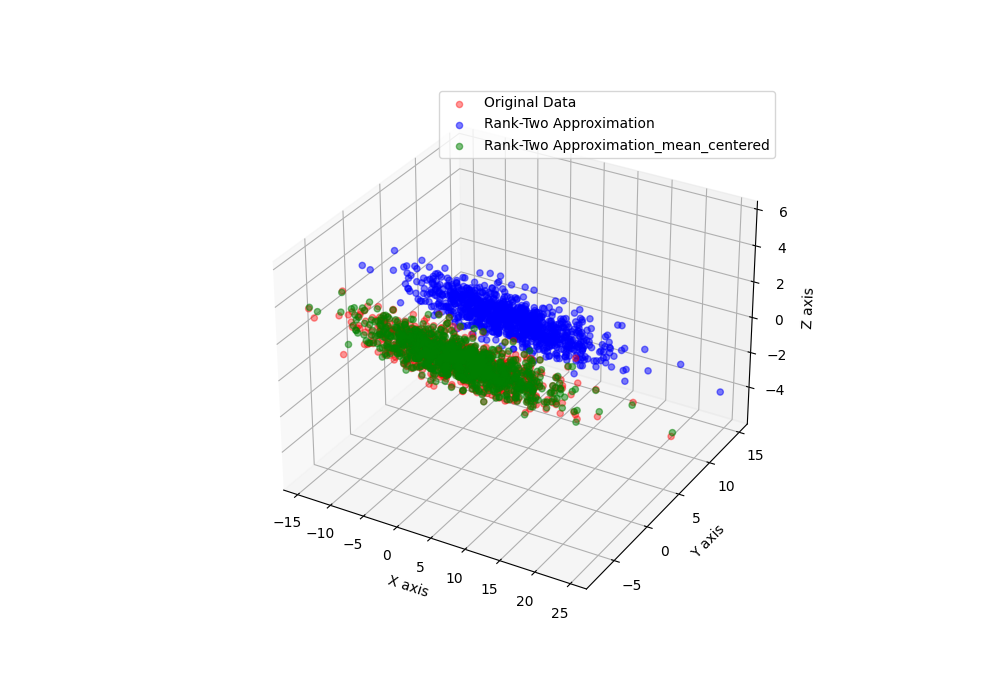

In [13]:
b = np.mean(X, axis=0)
# Assuming SVD has already been performed and the variables U, s, and VT are already defined
w1 = U[:, 0] * s[0]
w2 = U[:, 1] * s[1]


# Re-apply the mean to the rank-two approximation
X_approx_2_m = X_approx_2 + b

# Plotting the original data and the rank-two approximation
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the original data points
ax.scatter(X_m[:, 0], X_m[:, 1], X_m[:, 2], color='red', alpha=0.4,label='Original Data')

# Scatter plot for the rank-two approximation data points
ax.scatter(X_approx_2_m[:, 0], X_approx_2_m[:, 1], X_approx_2_m[:, 2], alpha=0.5,color='blue', label='Rank-Two Approximation')
ax.scatter(X_approx_2[:, 0], X_approx_2[:, 1], X_approx_2[:, 2], alpha=0.5,color='green', label='Rank-Two Approximation_mean_centered')


# Setting labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()

# Show the plot

## j

$$|E|_F^2 = sum_{i=3}^{n} \sigma_i^2$$

## k

In [14]:
# squared Frobenius norm of E for the rank-1 approximation
rank_1_error_squared = np.sum(s[1:]**2)

# squared Frobenius norm of E for the rank-2 approximation
rank_2_error_squared = np.sum(s[2:]**2)

print("Squared Frobenius norm of E for rank-1 approximation:", rank_1_error_squared)
print("Squared Frobenius norm of E for rank-2 approximation:", rank_2_error_squared)

Squared Frobenius norm of E for rank-1 approximation: 626.6899203862783
Squared Frobenius norm of E for rank-2 approximation: 152.9455757788646


# 3

In [47]:
import numpy as np
import scipy.io as sio
from numpy.linalg import svd, pinv
data = sio.loadmat('face_emotion_data.mat')
X, y = data['X'], data['y']


error_rates = []
best_rs = []
for i in range(8):
    for j in range(8):
        if i == j: continue
        test_idx_1 = np.arange(i*16, (i+1)*16)
        test_idx_2 = np.arange(j*16, (j+1)*16)
        train_idx = np.setdiff1d(np.arange(128), test_idx_1)
        train_idx = np.setdiff1d(train_idx, test_idx_2)
        X_train, y_train = X[train_idx, :], y[train_idx, :]
        X_test_1, y_test_1 = X[test_idx_1, :], y[test_idx_1, :]
        X_test_2, y_test_2 = X[test_idx_2, :], y[test_idx_2, :]

        
        best_error_rate = np.inf
        best_r = 1
        # Loop over values of r
        for r in range(1, 10):
            # Perform TVD
            U, s, Vt = svd(X_train, full_matrices=False)
            S_inv_r = np.diag(1 / s[:r])
            V_r = Vt[:r, :]
            U_r = U[:, :r]

            # Compute pseudo-inverse
            X_train_pinv = V_r.T @ S_inv_r @ U_r.T
            
            # Estimate weights
            w = X_train_pinv @ y_train

            # Predict labels for validation set (using test_idx_1 here as validation)
            y_pred = X_test_1 @ w
            y_pred = np.sign(y_pred)  # Assuming y values are +/-1 for classification
            error_rate = np.mean(y_pred != y_test_1)

            # Update best r based on validation error
            if error_rate < best_error_rate:
                best_error_rate = error_rate
                best_r = r
            best_rs.append(best_r)

        # Use best r to predict on test set (using test_idx_2 here as test)
        U, s, Vt = svd(X_train, full_matrices=False)
        S_inv_r = np.diag(1 / s[:best_r])
        V_r = Vt[:best_r, :]
        U_r = U[:, :best_r]
        X_train_pinv = V_r.T @ S_inv_r @ U_r.T
        w = X_train_pinv @ y_train

        y_pred = X_test_2 @ w
        y_pred = np.sign(y_pred)
        error_rate = np.mean(y_pred != y_test_2)
        error_rates.append(error_rate)

# Average error rate across all combinations
final_error_rate = np.mean(error_rates)
print("the best r is:", best_rs)
print(f"Final average error rate: {final_error_rate}")

the best r is: [1, 2, 2, 4, 5, 5, 5, 5, 5, 1, 2, 3, 4, 5, 5, 5, 5, 5, 1, 2, 2, 4, 5, 5, 5, 5, 9, 1, 1, 1, 4, 4, 6, 6, 6, 6, 1, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 4, 4, 4, 4, 8, 8, 1, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 4, 4, 4, 4, 4, 4, 1, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 7, 7, 7, 1, 1, 1, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 5, 5, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 5, 5, 5, 5, 5, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 2, 2, 4, 5, 5, 5, 5, 5, 1, 1, 1, 4, 5, 5, 5, 5, 5, 1, 1, 3, 4, 5, 5, 5, 5, 5, 1, 1, 3, 4, 5, 6, 6, 6, 6, 1, 1, 1, 4, 4, 6, 6, 6, 6, 1, 1, 3, 4, 5, 6, 6, 6, 6, 1, 1, 1, 4, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 5, 5, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

To incorporate SVD into the Ridge Regression solution, we have the relationship:

$$
X^T X + \lambda I = V (\Sigma^2 + \lambda I)V^T
$$

Where \( V \) is the matrix of right-singular vectors and \( \Sigma \) is the diagonal matrix of singular values from the SVD of \( X \). The solution to the Ridge Regression problem then becomes:

$$
\hat{w}_\lambda = V (\Sigma^2 + \lambda I)^{-1} \Sigma U^T y
$$

where \( U \) and \( V \) are the left and right singular matrices from the SVD of \( X \), and \( \Sigma \) is the diagonal matrix of singular values.


In [48]:
best_lambdas = []
lambdas = [2**(-1), 2**0, 2**1, 2**2, 2**3, 2**4]

for i in range(8):
    for j in range(8):
        if i == j: continue

        test_idx_1 = np.arange(i*16, (i+1)*16)
        test_idx_2 = np.arange(j*16, (j+1)*16)
        train_idx = np.setdiff1d(np.arange(128), test_idx_1)
        train_idx = np.setdiff1d(train_idx, test_idx_2)
        X_train, y_train = X[train_idx, :], y[train_idx, :]
        X_test_1, y_test_1 = X[test_idx_1, :], y[test_idx_1, :]
        X_test_2, y_test_2 = X[test_idx_2, :], y[test_idx_2, :]

        best_error_rate = np.inf
        best_lambda = None

        for lam in lambdas:
            # Perform SVD
            U, s, Vt = svd(X_train, full_matrices=False)
            
            # Compute the Ridge coefficients
            w_ridge = Vt.T @ np.diag(s / (s**2 + lam)) @ U.T @ y_train
            
            # Predict on the validation set
            y_pred_val = X_test_1 @ w_ridge
            
            # Compute the error rate on the validation set
            error_rate_val = np.mean((y_pred_val - y_test_1)**2)
            
            # If the error rate is lower, update the best_lambda and best_error_rate
            if error_rate_val < best_error_rate:
                best_error_rate = error_rate_val
                best_lambda = lam
        

        best_lambdas.append(best_lambda)

        # Use the best lambda to compute the Ridge coefficients
        U, s, Vt = svd(X_train, full_matrices=False)
        w_ridge = Vt.T @ np.diag(s / (s**2 + best_lambda)) @ U.T @ y_train
        
        # Predict on the test set
        y_pred_test = X_test_2 @ w_ridge
        
        # Compute the error rate on the test set
        error_rate_test = np.mean((y_pred_test - y_test_2)**2)
        
        # Store the error rate
        error_rates.append(error_rate_test)

# Calculate the average error rate across all folds
average_error_rate = np.mean(error_rates)
print(f'Average Error Rate: {average_error_rate}')
print(f'Best Lambdas: {best_lambdas}')


Average Error Rate: 0.18023028653047457
Best Lambdas: [2, 0.5, 0.5, 0.5, 0.5, 2, 0.5, 8, 8, 8, 8, 8, 8, 8, 2, 4, 2, 2, 2, 2, 2, 0.5, 2, 4, 8, 4, 2, 2, 8, 8, 8, 16, 16, 8, 8, 8, 8, 4, 8, 8, 8, 8, 4, 4, 0.5, 0.5, 2, 4, 2, 0.5, 0.5, 1, 0.5, 0.5, 1, 0.5]
